# setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [ ]:
!pip install xport

In [ ]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


#Creating LC comment files for CUSEZN_H (Copper, Selenium & Zinc - Serum) where everything is detect for everyone

In [ ]:
df['CUSEZN_H'].head()

,SEQN,WTSA2YR,LBXSCU,LBDSCUSI,LBXSSE,LBDSSESI,LBXSZN,LBDSZNSI,URXUCR
0,73560.0,183653.604036,122.0,19.15,112.2,1.42,79.9,12.22,76.0
1,73564.0,194847.483347,128.0,20.10,131.2,1.67,81.0,12.39,242.0
2,73567.0,100284.090673,128.6,20.19,114.0,1.45,73.2,11.20,215.0
3,73583.0,163017.304491,NaN,NaN,NaN,NaN,NaN,NaN,151.0
4,73585.0,55880.049721,86.1,13.52,114.5,1.45,89.8,13.74,100.0


In [ ]:
df['CUSEZN_H']['LBDSCULC']=0
df['CUSEZN_H']['LBDSSELC']=0
df['CUSEZN_H']['LBDSZNLC']=0
df['CUSEZN_H']['URDUCRLC']=0

#making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

# d_p_dropna = dictionary of detect percent, omitting the Nan values

In [ ]:
#df['AMDGYD_H']
#print(fnames)
d_p = {}
d_p_dropna = {}
for name in fnames:
  # for each chemical , create df with only 'LC' cols
  n = df[name].loc[:,df[name].columns.str.endswith('LC')]
  # get percentage 
  for column in n:
    p = round(((n[column][n[column]==0].count())/len(n))*100,2)
    d_p[column] = p
    p_dropna = round(((n[column][n[column]==0].count())/len(n[column].dropna()))*100,2)
    d_p_dropna[column] = p_dropna


In [ ]:
#removing what is not a comment code, but just ends with 'LC'
d_p.pop("URXTLC")
d_p_dropna.pop("URXTLC")

0.0

In [ ]:
d_p_dropna

{'LBD2DFLC': 18.39,
 'LBD4CELC': 0.0,
 'LBDACRLC': 100.0,
 'LBDBCDLC': 71.01,
 'LBDBGELC': 0.83,
 'LBDBGMLC': 74.49,
 'LBDBMNLC': 100.0,
 'LBDBPBLC': 100.0,
 'LBDBSELC': 100.0,
 'LBDEOALC': 96.5,
 'LBDFORLC': 100.0,
 'LBDGLYLC': 100.0,
 'LBDIHGLC': 17.39,
 'LBDPFLLC': 86.75,
 'LBDSCULC': 100.0,
 'LBDSSELC': 100.0,
 'LBDSZNLC': 100.0,
 'LBDTHGLC': 74.32,
 'LBDV06LC': 2.22,
 'LBDV07LC': 1.87,
 'LBDV08LC': 1.22,
 'LBDV1DLC': 0.0,
 'LBDV2ALC': 1.5,
 'LBDV3BLC': 0.0,
 'LBDV4CLC': 7.47,
 'LBDVBFLC': 5.48,
 'LBDVBMLC': 12.09,
 'LBDVBZLC': 24.98,
 'LBDVC6LC': 1.7,
 'LBDVCBLC': 0.03,
 'LBDVCFLC': 48.92,
 'LBDVCMLC': 10.39,
 'LBDVCTLC': 0.03,
 'LBDVDBLC': 43.76,
 'LBDVDELC': 0.0,
 'LBDVDXLC': 0.0,
 'LBDVEALC': 1.56,
 'LBDVEBLC': 27.27,
 'LBDVECLC': 0.38,
 'LBDVEELC': 0.2,
 'LBDVFNLC': 14.83,
 'LBDVFTLC': 0.0,
 'LBDVHTLC': 0.84,
 'LBDVIPLC': 0.19,
 'LBDVMCLC': 0.16,
 'LBDVMELC': 2.35,
 'LBDVMPLC': 1.69,
 'LBDVNBLC': 0.0,
 'LBDVOXLC': 26.97,
 'LBDVTCLC': 0.58,
 'LBDVTELC': 0.53,
 'LBDVTOLC': 95.81

In [ ]:
len(d_p)

135

In [ ]:
#np.percentile(np.array(list(d_p.items())),[0,25,50,75,100])

In [ ]:
type(d_p)
L2=np.array(list(d_p.items()))

#Decide which we can treat as binary


In [ ]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p_dropna.items() if (val <= 30 or val >= 70)}

In [ ]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
for key in df:
    binary_cols = df[key].loc[:,df[key].columns.str.endswith('LC')]
    binary_dataset[key] = binary_cols


In [ ]:
binary_list = []
for key in binary_dataset:
  binary_dataset[key].dropna()
  binary_list.append(binary_dataset[key])


In [ ]:
len(binary_list)

17

In [ ]:
binary_df = pd.concat(binary_dataset.values())
binary_df.head()

,LBD2DFLC,LBD4CELC,LBDV06LC,LBDV07LC,LBDV08LC,LBDV1DLC,LBDV2ALC,LBDV3BLC,LBDV4CLC,LBDVBFLC,...,URDDEALC,URDDHDLC,LBDEOALC,LBDPFLLC,LBDSCULC,LBDSSELC,LBDSZNLC,URDUCRLC,LBDACRLC,LBDGLYLC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'URDDEALC', 'URDDHDLC', 'LBDEOALC', 'LBDPFLLC', 'LBDSCULC', 'LBDSSELC',
       'LBDSZNLC', 'URDUCRLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=136)

In [ ]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

# First, let's look at overlap with the PFAS Group

In [ ]:
#NAIMAN'S ORIGINAL CODE
# For each pair of data frames determine the number of entries in the intersection.
# wanted to know where i have files with multiple chemicals for one person
#
ndf=len(fnames)
M=np.zeros((ndf,ndf))
for i in range(ndf):
    for j in range(ndf):
        fnamei=fnames[i]
        fnamej=fnames[j]
        dfi=df[fnamei]
        dfj=df[fnamej]
        SEQNi=set(dfi.SEQN)
        SEQNj=set(dfj.SEQN)
        M[i,j]=len(SEQNi.intersection(SEQNj))
ndf

17

In [ ]:
#NAIMAN'S ORIGINAL CODE
# make list of all SEQNs in all the datasets, find that there is 9422 people
#
ALLSEQN=set()
for i in range(ndf):
    SEQN=set(df[fnames[i]].SEQN.astype(int))
    ALLSEQN=ALLSEQN.union(SEQN)
print(len(ALLSEQN))
#
# for each SEQN count number of data frames in which it appears
#
ALLSEQN=list(ALLSEQN)
print(len(ALLSEQN))
#
# index for each sequence number
#
index_of_sequence_number={}
ctr=0
for seqn in ALLSEQN:
    index_of_sequence_number[seqn]=ctr
    ctr+=1

9422
9422


In [ ]:
# make list of all SEQNs in PFAS group
PFAS_SEQN=[]
for i in df['PFAS_H']['SEQN']:
  PFAS_SEQN.append(i)
len(PFAS_SEQN)

2339

In [ ]:
#counting how many people show up in PFAS and other groups
count=0
for i in ALLSEQN:
  if i in PFAS_SEQN:
    count +=1
count

2339

In [ ]:
#seeing which chemical groups have the same people tested as in PFAS
shared_w_PFAS=[]
for i in fnames:
  SEQN = df[i]['SEQN']
  intersection_set = set.intersection(set(SEQN), set(PFAS_SEQN))
  intersection_list = list(intersection_set)
  if len(intersection_list) > 0:
      shared_w_PFAS.append(i)
len(shared_w_PFAS)

7

In [ ]:
#removing PFAS itself form this list
shared_w_PFAS.remove('PFAS_H')
shared_w_PFAS

['VOCWB_H', 'PHTHTE_H', 'EPHPP_H', 'IHGEM_H', 'PBCD_H', 'FLDEP_H']

# master dataframe

In [ ]:
#making one master dataframe of everything that will be used to model PFAS_H chemicals
df_predict=pd.DataFrame(data=df['PFAS_H'])
#removing records where there are missing values in the PFAS file
df_predict=df_predict.dropna()
#the number of rows printed here should match the number of rows in the dataframe
print(df_predict.shape)
for i in shared_w_PFAS:
  df_predict=pd.merge(df_predict,pd.DataFrame(data=df[i]),on='SEQN',how='left')
df_predict

(2168, 18)


,SEQN,WTSB2YR_x,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,...,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,LBDPFL,LBDPFLLC
0,73568.0,270133.488619,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73571.0,138554.659645,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73574.0,46186.186645,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73576.0,37460.999852,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,0.0
4,73577.0,128174.418941,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,83711.0,82946.684281,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2164,83712.0,114681.392602,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,...,1.0,1.0,169.46,2.15,0.0,5.91,107.56,0.0,NaN,NaN
2165,83713.0,49551.258249,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2166,83717.0,29856.202622,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#checking that everything made it into the dataframe
count= 18
for i in shared_w_PFAS:
  j = pd.DataFrame(data=df[i])
  m = j.shape[1]-1
  count += m
count

177

#which of the chemicals do we have that we will treat as binary in our model?
#removing the continuous version of it

In [ ]:
intersection_set = set.intersection(set(df_predict.columns), set(binary_df.columns))
intersection_list = list(intersection_set)
#removing this one because it is one of very very few chemicals that don't follow the naming convention
intersection_list.remove('URXTLC')

In [ ]:
print(len(intersection_list))

73


In [ ]:
#making sure we won't get rid of anything from the PFAS group that is considered a binary feature
for i in intersection_list:
  if i in df["PFAS_H"].columns:
    intersection_list.remove(i)
len(intersection_list)

73

In [ ]:
intersection_list

['LBDBPBLC',
 'LBDVCTLC',
 'LBDVBFLC',
 'URDMEPLC',
 'LBDVVBLC',
 'LBDV08LC',
 'LBDVEALC',
 'LBDVEBLC',
 'LBDBMNLC',
 'URDDCBLC',
 'URDBP3LC',
 'LBDPFLLC',
 'LBDVTOLC',
 'LBDVDXLC',
 'LBDVOXLC',
 'LBDVCMLC',
 'LBDVBMLC',
 'URDMNPLC',
 'LBDIHGLC',
 'LBDTHGLC',
 'LBDVDBLC',
 'URDCNPLC',
 'LBDVFNLC',
 'LBDV07LC',
 'URDMBPLC',
 'URDMZPLC',
 'LBDV4CLC',
 'LBD4CELC',
 'URDTRSLC',
 'LBDVTPLC',
 'LBDVBZLC',
 'URDMCHLC',
 'LBDVXYLC',
 'URDBUPLC',
 'LBDVMELC',
 'LBDVNBLC',
 'LBDV1DLC',
 'URDMOHLC',
 'URDMHPLC',
 'LBDVFTLC',
 'URDMC1LC',
 'LBD2DFLC',
 'LBDV2ALC',
 'URDMIBLC',
 'URDCOPLC',
 'LBDV3BLC',
 'LBDVTELC',
 'LBDVDELC',
 'LBDBGELC',
 'LBDVMCLC',
 'LBDBSELC',
 'LBDVCBLC',
 'LBDVIPLC',
 'LBDVMPLC',
 'URDBPSLC',
 'URDTLCLC',
 'URD14DLC',
 'URDMHHLC',
 'LBDBGMLC',
 'URDBPFLC',
 'URDPPBLC',
 'LBDVCFLC',
 'LBDVTCLC',
 'URDMPBLC',
 'URDBPHLC',
 'LBDV06LC',
 'LBDBCDLC',
 'LBDVC6LC',
 'URDECPLC',
 'LBDVECLC',
 'URDEPBLC',
 'LBDVEELC',
 'LBDVHTLC']

In [ ]:
#percentage of what is binary in df
len(intersection_list)/len(df_predict)*100

3.367158671586716

In [ ]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [ ]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

73

In [ ]:
#making sure we won't get rid of anything from the PFAS group that is considered a binary feature
for i in cols_to_drop:
  if i in df["PFAS_H"].columns:
    cols_to_drop.remove(i)

In [ ]:
len(cols_to_drop)
cols_to_drop

['LBXBPB',
 'LBXVCT',
 'LBXVBF',
 'URXMEP',
 'LBXVVB',
 'LBXV08',
 'LBXVEA',
 'LBXVEB',
 'LBXBMN',
 'URXDCB',
 'URXBP3',
 'LBXPFL',
 'LBXVTO',
 'LBXVDX',
 'LBXVOX',
 'LBXVCM',
 'LBXVBM',
 'URXMNP',
 'LBXIHG',
 'LBXTHG',
 'LBXVDB',
 'URXCNP',
 'LBXVFN',
 'LBXV07',
 'URXMBP',
 'URXMZP',
 'LBXV4C',
 'LBX4CE',
 'URXTRS',
 'LBXVTP',
 'LBXVBZ',
 'URXMCH',
 'LBXVXY',
 'URXBUP',
 'LBXVME',
 'LBXVNB',
 'LBXV1D',
 'URXMOH',
 'URXMHP',
 'LBXVFT',
 'URXMC1',
 'LBX2DF',
 'LBXV2A',
 'URXMIB',
 'URXCOP',
 'LBXV3B',
 'LBXVTE',
 'LBXVDE',
 'LBXBGE',
 'LBXVMC',
 'LBXBSE',
 'LBXVCB',
 'LBXVIP',
 'LBXVMP',
 'URXBPS',
 'URXTLC',
 'URX14D',
 'URXMHH',
 'LBXBGM',
 'URXBPF',
 'URXPPB',
 'LBXVCF',
 'LBXVTC',
 'URXMPB',
 'URXBPH',
 'LBXV06',
 'LBXBCD',
 'LBXVC6',
 'URXECP',
 'LBXVEC',
 'URXEPB',
 'LBXVEE',
 'LBXVHT']

In [ ]:
#there were a few with unique naming conventions to change
i=['LBXV08','LBXVHT','LBXVIP','LBXVMP','URXMCH','LBXVFT','LBXPFL','LBXV07','LBXVEE']
for j in i:
  cols_to_drop.remove(j)
i=['LBXV08N','LBXVTHF','LBXVIPB','LBXVMCP','URXMHNC','LBXVTFT','LBDPFL','LBXV07N','LBXVDEE']
for j in i:
  cols_to_drop.append(j)

In [ ]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
df_predict=df_predict.drop(columns=cols_to_drop)

# removing subsample weights


In [ ]:
for i in df_predict.columns:
  if i.startswith('WT'):
    df_predict = df_predict.drop(columns=i)

# Imputation

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats

for col in df_predict.columns:
  for row in range(0,len(df_predict)):

    # replace Nan vals with 0 or 1 based on detect percentages in d_p_dropna for binary values
    if math.isnan(df_predict[col].values[row]) and col in binary_df.columns:
      df_predict[col].values[row] = random.choices([0,1], weights = (d_p_dropna.get(col), 100.00-d_p_dropna.get(col)), k=1)[0]

    # if column is Nan but not binary replace with geometric mean in col. basing off those shared with PFAS instead of overall to be more accurate in this context
    elif math.isnan(df_predict[col].values[row]):
      df_predict[col].values[row] = stats.gmean(df_predict.dropna()[col])

In [ ]:
df_predict

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,LBDBPBLC,LBDBCDSI,LBDBCDLC,LBDTHGSI,LBDTHGLC,LBDBSESI,LBDBSELC,LBDBMNSI,LBDBMNLC,LBDPFLLC
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.243725,1.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
2164,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,0.890000,0.0,1.000000,1.0,2.150000,0.0,107.560000,0.0,0.0
2165,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
2166,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.243725,1.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0


#Splitting the data
We are trying to predict detect or not of Perfluorodecanoic acid (ug/L)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_predict, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']
Y_test=test['LBDPFDEL']

# stepwise regression (feature one)

In [ ]:
include=list(X_train.columns)

In [ ]:
import statsmodels.api as sm
#testing out for one at a time before creating loop
log_reg=sm.Logit(Y_train,X_train[include[0]]).fit()
#see it all
print(log_reg.summary())
#see log likelihood
print(log_reg.llf)
loglik =log_reg.llf
#BIC calculation (math.log with one arguement is natural log)
bic = (1 * math.log(len(Y_test))) - (2 * loglik)
print(bic)
#the built in bic is slightly different, we will stay with ours
log_reg.bic


Optimization terminated successfully.
         Current function value: 0.510773
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1733
Method:                           MLE   Df Model:                            0
Date:                Mon, 07 Mar 2022   Pseudo R-squ.:               6.088e-06
Time:                        13:11:20   Log-Likelihood:                -885.68
converged:                       True   LL-Null:                       -885.69
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SEQN       -1.702e-05   7.53e-07    -22.611      0.000   -1.85e-05   -1.55e-05
-885.6804096453948
1777.43386

1778.81900544813

In [ ]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict= {}
loglik_dict= {}
causes_error=[]
#for loop for the first to include
for i in include:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[i]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict[i]=bic
    loglik_dict[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.510773
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.504253
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.689719
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.543493
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.615670
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.511515
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.512152
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.513230
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545113
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.412945
  

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.550646
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.512442
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.511621
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.510776
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.512442
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.688431
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.511042
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.510776
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626582
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.556722
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
#looking at all the bic scores
bic_dict

{'LBD2DFLC': 1908.3927970355044,
 'LBD4CELC': 1777.444648341052,
 'LBDBCDLC': 2238.558102030453,
 'LBDBCDSI': 2115.916815898753,
 'LBDBGELC': 1784.1421772459394,
 'LBDBGMLC': 2280.4042647157976,
 'LBDBMNSI': 1817.59797952806,
 'LBDBPBSI': 1978.5300574456542,
 'LBDBSESI': 1782.3174025015646,
 'LBDIHGLC': 1902.4943893921788,
 'LBDIHGSI': 1814.0490724288989,
 'LBDMPAHL': 2141.2178836779585,
 'LBDPFBSL': 1782.2165895187293,
 'LBDPFDOL': 1916.2334281165495,
 'LBDPFHPL': 1896.5255905190907,
 'LBDPFHSL': 2398.020170500586,
 'LBDPFLLC': 2332.804316613573,
 'LBDPFNAL': 2386.249562395208,
 'LBDPFUAL': 2333.742686073502,
 'LBDTHGLC': 2277.664141705031,
 'LBDTHGSI': 1829.8513643747897,
 'LBDV06LC': 1792.9338900717312,
 'LBDV07LC': 1797.0898398384556,
 'LBDV08LC': 1780.780117492968,
 'LBDV1DLC': 1777.444648341052,
 'LBDV2ALC': 1768.0234008850612,
 'LBDV3BLC': 1777.444648341052,
 'LBDV4CLC': 1814.8361932957616,
 'LBDVBFLC': 1802.1243319037894,
 'LBDVBMLC': 1854.5501478592093,
 'LBDVBZLC': 1923.44459

In [ ]:
#looking at all the log likelihoods
loglik_dict

{'LBD2DFLC': -951.1598762507019,
 'LBD4CELC': -885.6858019034757,
 'LBDBCDLC': -1116.2425287481763,
 'LBDBCDSI': -1054.9218856823263,
 'LBDBGELC': -889.0345663559194,
 'LBDBGMLC': -1137.1656100908485,
 'LBDBMNSI': -905.7624674969798,
 'LBDBPBSI': -986.2285064557768,
 'LBDBSESI': -888.122178983732,
 'LBDIHGLC': -948.2106724290392,
 'LBDIHGSI': -903.9880139473992,
 'LBDMPAHL': -1067.572419571929,
 'LBDPFBSL': -888.0717724923144,
 'LBDPFDOL': -955.0801917912245,
 'LBDPFHPL': -945.2262729924951,
 'LBDPFHSL': -1195.9735629832428,
 'LBDPFLLC': -1163.3656360397363,
 'LBDPFNAL': -1190.0882589305538,
 'LBDPFUAL': -1163.8348207697009,
 'LBDTHGLC': -1135.7955485854652,
 'LBDTHGSI': -911.8891599203446,
 'LBDV06LC': -893.4304227688153,
 'LBDV07LC': -895.5083976521776,
 'LBDV08LC': -887.3535364794337,
 'LBDV1DLC': -885.6858019034757,
 'LBDV2ALC': -880.9751781754803,
 'LBDV3BLC': -885.6858019034757,
 'LBDV4CLC': -904.3815743808306,
 'LBDVBFLC': -898.0256436848445,
 'LBDVBMLC': -924.2385516625544,
 'L

In [ ]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))],min(bic_dict.values()),loglik_dict[list(loglik_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))]])

LBXPFNA 1438.166441565019 -716.0466985154593


In [ ]:
log_reg=sm.Logit(Y_train,X_train['LBXPFNA']).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.412945
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1733
Method:                           MLE   Df Model:                            0
Date:                Mon, 07 Mar 2022   Pseudo R-squ.:                  0.1915
Time:                        13:11:20   Log-Likelihood:                -716.05
converged:                       True   LL-Null:                       -885.69
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -2.3867      0.108    -22.044      0.000      -2.599      -2.174


# Stepwise Regression (feature 2)

In [ ]:
#we make a new list without the feature we are already using, and removing the chemicals that create singular matrix issues
#(which is Perfluorononanoic acid (ug/L) detection level)
include_2=list(X_train.drop(columns=['LBXPFNA','LBDBPBLC', 'LBDBSELC', 'LBDBMNLC']).columns)

In [ ]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_2= {}
loglik_dict_2= {}
causes_error_2=[]
#for loop for the second to include
for i in include_2:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[['LBXPFNA',i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_2[i]=bic
    loglik_dict_2[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_2.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.394175
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.412945
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.408347
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.412774
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404326
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.395360
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.394486
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.406926
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.398813
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.405063
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.409107
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.412829
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.412916
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.412875
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.412917
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.407000
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.398107
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.404756
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.394765
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.410748
         Iterations 7
Optimization term

In [ ]:
causes_error_2

[]

In [ ]:
#looking at all the bic scores
bic_dict_2

{'LBD2DFLC': 1396.878587347424,
 'LBD4CELC': 1371.8819818761872,
 'LBDBCDLC': 1437.4449897553047,
 'LBDBCDSI': 1425.9316679629933,
 'LBDBGELC': 1375.118842299682,
 'LBDBGMLC': 1430.546343860257,
 'LBDBMNSI': 1370.2589372573696,
 'LBDBPBSI': 1424.464881982552,
 'LBDBSESI': 1370.8075352380592,
 'LBDIHGLC': 1409.767726366261,
 'LBDIHGSI': 1386.7082063174244,
 'LBDMPAHL': 1408.2757308671617,
 'LBDPFBSL': 1374.1510479406365,
 'LBDPFDOL': 1398.2659263617238,
 'LBDPFHPL': 1389.1556196122287,
 'LBDPFHSL': 1422.2213413747295,
 'LBDPFLLC': 1434.9134397811195,
 'LBDPFNAL': 1410.8322401602782,
 'LBDPFUAL': 1260.520194984067,
 'LBDTHGLC': 1434.111060999238,
 'LBDTHGSI': 1437.663385280858,
 'LBDV06LC': 1378.2791160647744,
 'LBDV07LC': 1372.6282943140454,
 'LBDV08LC': 1378.7143686684897,
 'LBDV1DLC': 1371.8819818761872,
 'LBDV2ALC': 1386.6018671479508,
 'LBDV3BLC': 1371.8819818761872,
 'LBDV4CLC': 1393.6476074297343,
 'LBDVBFLC': 1387.3316047283001,
 'LBDVBMLC': 1399.6471885431804,
 'LBDVBZLC': 1415.

In [ ]:
#looking at all the log likelihoods
loglik_dict_2

{'LBD2DFLC': -695.4027714066617,
 'LBD4CELC': -682.9044686710433,
 'LBDBCDLC': -715.6859726106021,
 'LBDBCDSI': -709.9293117144464,
 'LBDBGELC': -684.5228988827907,
 'LBDBGMLC': -712.2366496630782,
 'LBDBMNSI': -682.0929463616345,
 'LBDBPBSI': -709.1959187242257,
 'LBDBSESI': -682.3672453519794,
 'LBDIHGLC': -701.8473409160803,
 'LBDIHGSI': -690.3175808916619,
 'LBDMPAHL': -701.1013431665306,
 'LBDPFBSL': -684.039001703268,
 'LBDPFDOL': -696.0964409138116,
 'LBDPFHPL': -691.5412875390641,
 'LBDPFHSL': -708.0741484203145,
 'LBDPFLLC': -714.4201976235095,
 'LBDPFNAL': -702.3795978130888,
 'LBDPFUAL': -627.2235752249833,
 'LBDTHGLC': -714.0190082325687,
 'LBDTHGSI': -715.7951703733787,
 'LBDV06LC': -686.1030357653369,
 'LBDV07LC': -683.2776248899725,
 'LBDV08LC': -686.3206620671946,
 'LBDV1DLC': -682.9044686710433,
 'LBDV2ALC': -690.2644113069251,
 'LBDV3BLC': -682.9044686710433,
 'LBDV4CLC': -693.7872814478169,
 'LBDVBFLC': -690.6292800970998,
 'LBDVBMLC': -696.7870720045399,
 'LBDVBZLC'

In [ ]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))],min(bic_dict_2.values()),loglik_dict_2[list(loglik_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))]])

LBDPFUAL 1260.520194984067 -627.2235752249833


In [ ]:
log_reg=sm.Logit(Y_train,X_train[['LBXPFNA','LBDPFUAL']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.361721
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1732
Method:                           MLE   Df Model:                            1
Date:                Mon, 07 Mar 2022   Pseudo R-squ.:                  0.2918
Time:                        13:11:21   Log-Likelihood:                -627.22
converged:                       True   LL-Null:                       -885.69
Covariance Type:            nonrobust   LLR p-value:                1.975e-114
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -4.3141      0.248    -17.379      0.000      -4.801      -3.828
LBDPFUAL       1.5710      0.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train[['LBXPFNA','LBDPFUAL']],Y_train)
prediction = model.predict(X_test[['LBXPFNA','LBDPFUAL']])
score = model.score(X_test[['LBXPFNA','LBDPFUAL']],Y_test)
print(score)

0.8525345622119815


In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[326  13]
 [ 51  44]]


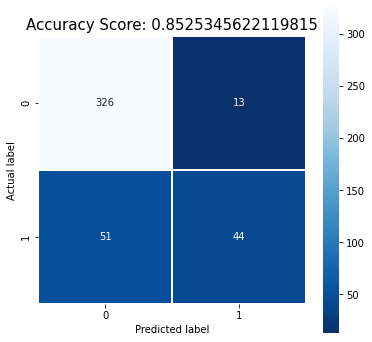

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Stepwise Regression (feature 3)




In [ ]:
#we make a new list without the feature we are already using 
#(which is Perfluoroundecanoic comment a.k.a binary detect or not)
include_3=list(X_train.drop(columns=['LBDBPBLC', 'LBDBSELC', 'LBDBMNLC','LBXPFNA','LBDPFUAL']).columns)

In [ ]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_3= {}
loglik_dict_3= {}
causes_error_3=[]
#for loop for the second to include
for i in include_3:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[['LBXPFNA','LBDPFUAL',i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_3[i]=bic
    loglik_dict_3[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_3.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.352527
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.360469
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361136
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.358707
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361683
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.353929
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.352981
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.357610
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.359446
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.360003
  

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.352372
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.357528
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.356689
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.357892
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.360546
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.354585
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.352189
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.360646
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.358896
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.352372
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.360945
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.360210
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.359659
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361547
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361246
         Iterations 8
         Current function value: 0.360459
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.361641
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361572
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361472
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361618
         Iterations 8
Optimization ter

In [ ]:
causes_error_3

[]

In [ ]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
#this got annoying to change so made a function
def bic_loglik(bicdictionary,loglikedictionary):
  return list(bicdictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))],min(bicdictionary.values()),loglikedictionary[list(loglik_dict_2.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))]]

In [ ]:
print(bic_loglik(bic_dict_3,loglik_dict_3))

('LBDV2ALC', 1218.2974864972477, -611.0135669563899)


In [ ]:
log_reg=sm.Logit(Y_train,X_train[['LBXPFNA','LBDPFUAL','LBDVCBLC']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.352189
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1731
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Mar 2022   Pseudo R-squ.:                  0.3105
Time:                        13:11:23   Log-Likelihood:                -610.70
converged:                       True   LL-Null:                       -885.69
Covariance Type:            nonrobust   LLR p-value:                3.744e-120
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -3.1029      0.316     -9.829      0.000      -3.722      -2.484
LBDPFUAL       3.1006      0.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train[['LBXPFNA','LBDPFUAL','LBDVCBLC']],Y_train)
prediction = model.predict(X_test[['LBXPFNA','LBDPFUAL','LBDVCBLC']])
score = model.score(X_test[['LBXPFNA','LBDPFUAL','LBDVCBLC']],Y_test)
print(score)

0.8525345622119815


In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[326  13]
 [ 51  44]]


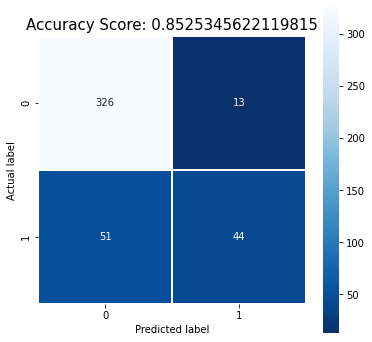

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Stepwise Regression (feature 4)




In [ ]:
#we make a new list without the feature we are already using 
#(which is Perfluoroundecanoic comment a.k.a binary detect or not)
include_4=list(X_train.drop(columns=['LBDBPBLC', 'LBDBSELC', 'LBDBMNLC','LBXPFNA','LBDPFUAL','LBDVCBLC']).columns)

In [ ]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_3= {}
loglik_dict_3= {}
causes_error_3=[]
#for loop for the second to include
for i in include_3:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[['LBXPFNA','LBDPFUAL',i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_3[i]=bic
    loglik_dict_3[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_3.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.352527
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.360469
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361136
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.358707
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361683
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.353929
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.352981
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.357610
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.359446
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.360003
  

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.357892
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.360546
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.354585
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.352189
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.360646
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.358896
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.352372
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.360891
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.352372
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.353188
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.359659
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361547
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361246
         Iterations 8
         Current function value: 0.360459
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.361641
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361572
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361472
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361618
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361570
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.359535
         Iterations 8
Optimization ter

In [ ]:
causes_error_3

[]

In [ ]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
#this got annoying to change so made a function
def bic_loglik(bicdictionary,loglikedictionary):
  return list(bicdictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))],min(bicdictionary.values()),loglikedictionary[list(loglik_dict_2.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))]]

In [ ]:
print(bic_loglik(bic_dict_3,loglik_dict_3))

('LBDV2ALC', 1218.2974864972477, -611.0135669563899)


In [ ]:
log_reg=sm.Logit(Y_train,X_train[['LBXPFNA','LBDPFUAL','LBDVCBLC']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.352189
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1731
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Mar 2022   Pseudo R-squ.:                  0.3105
Time:                        13:11:29   Log-Likelihood:                -610.70
converged:                       True   LL-Null:                       -885.69
Covariance Type:            nonrobust   LLR p-value:                3.744e-120
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -3.1029      0.316     -9.829      0.000      -3.722      -2.484
LBDPFUAL       3.1006      0.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf = model.fit(X_train[['LBXPFNA','LBDPFUAL','LBDVCBLC']],Y_train)
prediction = clf.predict_proba(X_test[['LBXPFNA','LBDPFUAL','LBDVCBLC']])
score = model.score(X_test[['LBXPFNA','LBDPFUAL','LBDVCBLC']],Y_test)
print(score)

0.8617511520737328


In [ ]:
#the actual probability of detection
Y_test.value_counts()
342/(92+342)

0.7880184331797235

In [ ]:
prediction[:,1]

array([6.42176394e-02, 2.46899317e-03, 1.99757542e-02, 7.41361023e-04,
       4.33032753e-01, 2.22337962e-04, 2.22337962e-04, 2.68086543e-02,
       2.94860691e-01, 1.86290433e-01, 2.94860691e-01, 5.07927819e-01,
       1.11382091e-01, 6.07266541e-03, 1.82805153e-03, 8.18962053e-03,
       1.44859845e-01, 2.46899317e-03, 1.11382091e-01, 1.10363602e-02,
       1.86290433e-01, 8.18962053e-03, 2.36296098e-01, 1.35327028e-03,
       5.07927819e-01, 3.58932124e-02, 5.82468724e-01, 1.48578124e-02,
       6.07266541e-03, 3.61077563e-01, 2.36296098e-01, 1.48578124e-02,
       2.36296098e-01, 1.86290433e-01, 3.33390775e-03, 5.07927819e-01,
       5.07927819e-01, 3.58932124e-02, 6.07266541e-03, 1.86290433e-01,
       5.82468724e-01, 2.68086543e-02, 3.58932124e-02, 5.07927819e-01,
       3.61077563e-01, 1.82805153e-03, 1.48578124e-02, 7.41361023e-04,
       4.33032753e-01, 3.61077563e-01, 4.83235037e-02, 3.61077563e-01,
       2.94860691e-01, 2.68086543e-02, 5.82468724e-01, 1.84481411e-03,
      

In [ ]:
predictions = [round(value,3) for value in prediction[:,1]]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

ValueError: ignored

In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

ValueError: ignored

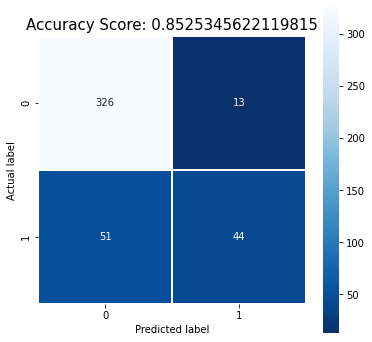

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#still broken loops

#ROC and thresholds

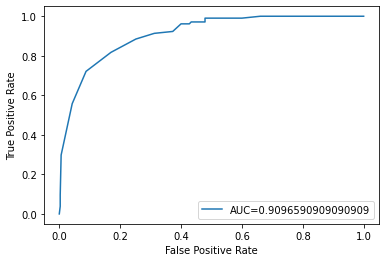

In [ ]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  prediction[:,1])
auc = metrics.roc_auc_score(Y_test,  prediction[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

interpretting ROC : classifiers that give curves closer to the top left corner indicate a better performance. 

as a baseline, note that random classifiers are expected to produce a curve from points on the diagonal.

AUC of ~ 0.74 implies moderate accuracy 

In [ ]:
print(fpr,tpr)
print(tpr * (1-fpr))
print(threshold)

[0.         0.03834808 1.        ] [0.         0.46315789 1.        ]
[0.         0.44539668 0.        ]
[2. 1. 0.]


In [ ]:
#threshold
np.sqrt(tpr * (1-fpr))

array([0.        , 0.66738046, 0.        ])

[A Gentle Introduction to Threshold-Moving for Imbalanced Classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

#logistic regression for only PFAS group

In [ ]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS.drop(columns = 'WTSB2YR')
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [ ]:
df_PFAS.head()

,SEQN,WTSB2YR,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,270133.488619,0.2,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.5,0.0,0.10,0.0,0.07,1.0
1,73571.0,138554.659645,0.3,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.3,0.0,0.07,1.0,0.07,1.0
2,73574.0,46186.186645,0.1,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,0.0,0.07,1.0,0.07,1.0
3,73576.0,37460.999852,0.2,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,0.6,0.0,0.07,1.0,0.10,0.0
4,73577.0,128174.418941,0.1,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0


In [ ]:
len(df_PFAS.columns)

18

In [ ]:
# stepwise regression starting with PFAS chemicals already in dataframe : 

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_PFAS, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']  # Perfluorodecanoic acid comment (binary)
Y_test=test['LBDPFDEL']

# set BIC to the BIC from regression with only PFAS chemicals :
log_reg=sm.Logit(Y_train,X_train).fit()
loglik =log_reg.llf
#BIC calculation (math.log with one arguement is natural log)
bic = (1 * math.log(len(Y_test))) - (2 * loglik)

####
# Create new test / train sets with all chemicals (not just PFAS)
train, test = train_test_split(df_predict.drop(columns = 'WTSB2YR'), test_size=0.2)     # use df_predict instead of df_PFAS 
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']  # Perfluorodecanoic acid comment (binary)
Y_test=test['LBDPFDEL']


use_in_stepwise = df_PFAS       # data frame of variables to use in regression (below loop adds columns)
sample_df = df_PFAS.drop(columns = ['LBDPFDEL','LBXPFDE', 'WTSB2YR'])   # placeholder data frame to run Logit and measure BIC


#this is what we already know causes singular matrix issues
#causes_errors=['LBDBPBLC', 'LBDBSELC', 'LBDBMNLC']

# while True,

for i in include:
  sample_df[i] = df_predict[i]
  print(sample_df.columns, len(sample_df.columns))
  sample_log_reg = sm.Logit(Y_train, X_train[sample_df.columns]).fit()
  sample_loglik = sample_log_reg.llf
  sample_bic = (1 * math.log(len(Y_test))) - (2 * sample_loglik)
  if sample_bic < bic : 
    use_in_stepwise = sample_df
    bic = sample_bic
  else : 
    sample_df.drop(columns = i)
    #break



use_in_stepwise.head()
print(bic)

# note with ['LBDPFDEL','LBXPFDE', 'WTSB2YR'] columns removed, we start with 15 variables from PFAS dataframe 

Optimization terminated successfully.
         Current function value: 0.347361
         Iterations 13
Index(['SEQN', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH', 'LBDMPAHL', 'LBXPFBS',
       'LBDPFBSL', 'LBXPFHP', 'LBDPFHPL', 'LBXPFNA', 'LBDPFNAL', 'LBXPFUA',
       'LBDPFUAL', 'LBXPFDO', 'LBDPFDOL'],
      dtype='object') 15
Optimization terminated successfully.
         Current function value: 0.336714
         Iterations 13
Index(['SEQN', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH', 'LBDMPAHL', 'LBXPFBS',
       'LBDPFBSL', 'LBXPFHP', 'LBDPFHPL', 'LBXPFNA', 'LBDPFNAL', 'LBXPFUA',
       'LBDPFUAL', 'LBXPFDO', 'LBDPFDOL'],
      dtype='object') 15
Optimization terminated successfully.
         Current function value: 0.336714
         Iterations 13
Index(['SEQN', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH', 'LBDMPAHL', 'LBXPFBS',
       'LBDPFBSL', 'LBXPFHP', 'LBDPFHPL', 'LBXPFNA', 'LBDPFNAL', 'LBXPFUA',
       'LBDPFUAL', 'LBXPFDO', 'LBDPFDOL'],
      dtype='object') 15
Optimization terminated successfully.
     

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


LinAlgError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_PFAS, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']  # Perfluorodecanoic acid comment (binary)
Y_test=test['LBDPFDEL']

In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train)
prediction = model.predict(X_test)
score = model.score(X_test,Y_test)
print(score)

0.7788018433179723


In [ ]:
#the actual probability of detection
print(Y_test.value_counts())
336/(336+98)


0.0    354
1.0     80
Name: LBDPFDEL, dtype: int64


0.7741935483870968

In [ ]:
predictions = [round(value) for value in prediction]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.815668202764977


In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[354   0]
 [ 80   0]]


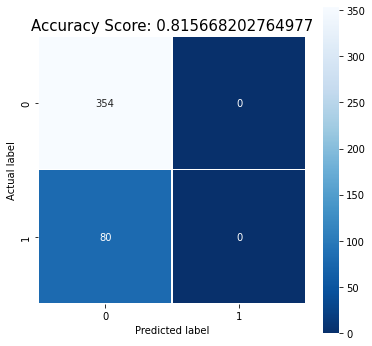

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

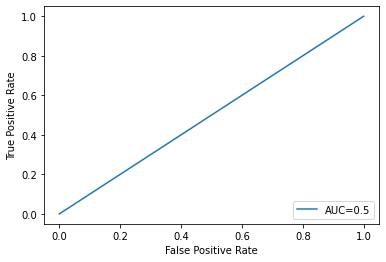

In [ ]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  prediction)
auc = metrics.roc_auc_score(Y_test,  prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# AUC = 0.5, need to improve model accuracy 

# Let's run XGBOOST to predict one of the detection levels for a PFAS chemical

In [ ]:
pip install xgboost

In [ ]:
#trying with everything
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict_proba(X_test)
predictions = [round(value) for value in y_pred[:,1]]
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)

0.8617511520737328


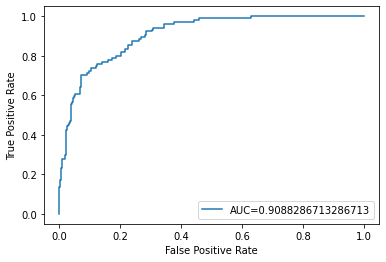

In [ ]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test,  y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

let's try with only pfas

In [ ]:

#removing continuos 
intersection_set = set.intersection(set(df_PFAS.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [ ]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [ ]:
cols_to_drop

[]

In [ ]:
for i in df_PFAS.columns:
  if i.startswith('WT'):
    df_PFAS = df_PFAS.drop(columns=i)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_predict, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']
Y_test=test['LBDPFDEL']

In [ ]:
X_train

,SEQN,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
875,77365.0,4.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0
1785,81415.0,5.5,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.9,0.0,0.30,0.0,0.07,1.0
730,76753.0,1.1,0.0,0.30,0.0,0.07,1.0,0.07,1.0,0.9,0.0,0.07,1.0,0.07,1.0
1578,80465.0,2.1,0.0,0.90,0.0,0.07,1.0,0.07,1.0,0.9,0.0,0.07,1.0,0.07,1.0
344,75081.0,1.3,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.8,0.0,0.10,0.0,0.07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,78665.0,13.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.8,0.0,0.20,0.0,0.07,1.0
1471,80044.0,0.7,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.6,0.0,0.07,1.0,0.07,1.0
1170,78708.0,1.0,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.6,0.0,0.07,1.0,0.07,1.0
1689,81015.0,0.3,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,0.0,0.20,0.0,0.07,1.0


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict_proba(X_test)
predictions = [round(value) for value in y_pred[:,1]]
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)

0.880184331797235


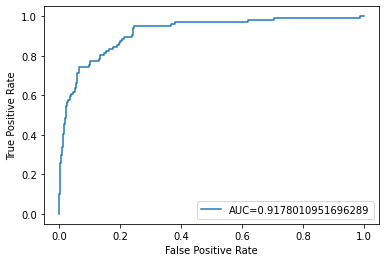

In [ ]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test,  y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
X_train

,SEQN,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,...,LBDBPBLC,LBDBCDSI,LBDBCDLC,LBDTHGSI,LBDTHGLC,LBDBSESI,LBDBSELC,LBDBMNSI,LBDBMNLC,LBDPFLLC
754,77109.0,2.0,0.0,0.07,1.0,0.10,0.0,0.30,0.0,0.8,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
1898,82532.0,0.6,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.9,...,0.0,1.243725,0.0,2.230941,1.0,2.454443,0.0,203.895252,0.0,0.0
1304,79768.0,0.8,0.0,0.80,0.0,0.07,1.0,0.07,1.0,1.8,...,0.0,10.050000,0.0,10.300000,0.0,2.440000,0.0,141.230000,0.0,0.0
554,76184.0,1.5,0.0,0.10,0.0,0.07,1.0,0.07,1.0,0.4,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
1928,82650.0,1.8,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.1,...,0.0,1.243725,1.0,2.230941,1.0,2.454443,0.0,203.895252,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,81321.0,0.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
1005,78287.0,0.5,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.3,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
1492,80620.0,0.8,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,...,0.0,4.000000,0.0,2.100000,0.0,2.360000,0.0,154.520000,0.0,1.0
22,73671.0,2.9,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.7,...,0.0,3.110000,0.0,5.000000,0.0,2.860000,0.0,100.460000,0.0,1.0
